In [2]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
from sklearn.model_selection import  StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    roc_curve, auc, classification_report, 
    matthews_corrcoef, accuracy_score, confusion_matrix
)
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Again, we are going to be applying the preprocessing steps, and then create a model for each machine learning algorithm we are using, with the proposed feature selection methods from the preprocessing notebook and the optimal hyperparameters from the hyperparameter_tuning notebook.

In [3]:
df = pd.read_csv('data/data.csv', low_memory=False)

In [4]:
max_vals = df.select_dtypes(include='number').max()
max_9 = max_vals[max_vals == 9].index.tolist()
for col in max_9:
    df.loc[df[col] == 9, col] = np.nan 
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

missing_subset = {'ALCFREQ', 'HATTMULT', 'STROKMUL', 'TIAMULT', 'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'CVDCOG', 'STROKCOG', 'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'PDNORMAL', 'SPEECH', 'FACEXP', 'TRESTRHD', 'TRESTLHD', 'TRESTRFT', 'TRESTLFT', 'TRACTRHD', 'TRACTLHD', 'RIGDNECK', 'RIGDUPRT', 'RIGDUPLF', 'RIGDLORT', 'RIGDLOLF', 'TAPSRT', 'TAPSLF', 'HANDMOVR', 'HANDMOVL', 'HANDALTR', 'HANDALTL', 'LEGRT', 'LEGLF', 'ARISING', 'POSTURE', 'GAIT', 'POSSTAB', 'BRADYKIN', 'RESTTRL', 'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'POSTINST', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL', 'CORTVISR', 'SOMATL', 'SOMATR', 'EYEPSP', 'DYSPSP', 'AXIALPSP', 'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR', 'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'MOMOPARK', 'MOMOALS', 'AMNDEM', 'PCA', 'NAMNDEM', 'AMYLPET', 'AMYLCSF', 'FDGAD', 'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH', 'IMAGEWMH', 'CANCER', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS', 'ARTH', 'ARTYPE', 'ARTUPEX', 'ARTLOEX', 'ARTSPIN', 'ARTUNKN', 'URINEINC', 'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC'}
cols_to_change = list(missing_subset.intersection(max_8))
df[cols_to_change] = df[cols_to_change].replace(8, np.nan)
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

df = df.drop(columns=['NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3', 'NPOLD4', 'NACCMICR', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NACCHEM', 'NACCARTE', 'NPWMR', 'NPPATH', 'NACCNEC', 'NPPATH2', 'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10', 'NPPATH11', 'NACCLEWY', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3', 'NPOFTD4', 'NPOFTD5', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE', 'NPPDXA', 'NPPDXB', 'NACCPRIO', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPARTAG', 'NPATGSEV', 'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'])

initial = df.shape[1]
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis=1)
remaining = df.shape[1]
dropped = initial - remaining

print(f"initial: {initial}")
print(f"remaining: {remaining}")
print(f"dropped: {dropped}")

initial: 862
remaining: 213
dropped: 649


In [5]:
impairment_vars = ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']

functional_impairment = df[impairment_vars].sum(axis=1, skipna=True)

df = pd.concat([df, functional_impairment.rename('FUNCTIONAL_IMPAIRMENT')], axis=1)
df.drop(columns=impairment_vars, inplace=True)

df = df.copy()

In [6]:
conditions = [
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == True),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == True)
]
values = [np.nan, True, False, False]

df["OUTCOME_WITHIN_4_YEARS"] = np.select(conditions, values, default=np.nan)
df = df.dropna(subset=["OUTCOME_WITHIN_4_YEARS"])

In [7]:
df = df.drop(columns=['TIME', 'OUTCOME_EVENTMCI'])
X = df.drop(columns=['OUTCOME_WITHIN_4_YEARS'])
y = df['OUTCOME_WITHIN_4_YEARS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
class HandleOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.3, upper_quantile=0.7):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.quantile_bounds_ = {}
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
        
        for col in numeric_columns:
            Q1 = X[col].quantile(self.lower_quantile)
            Q2 = X[col].quantile(self.upper_quantile)
            IQR = Q2 - Q1
            self.quantile_bounds_[col] = {
                'lower_bound': Q1 - 1.5 * IQR,
                'upper_bound': Q2 + 1.5 * IQR
            }
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

        for col in numeric_columns:
            if col not in self.quantile_bounds_:
                continue  
            bounds = self.quantile_bounds_[col]
            mean_value = X[col].mean()
            
            X[col] = np.where(X[col] < bounds['lower_bound'], mean_value, 
                              np.where(X[col] > bounds['upper_bound'], mean_value, X[col]))
        return X.values

Logistic regression:

In [8]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=mutual_info_classif, k=100)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=log_reg, n_features_to_select=50)

logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LogisticRegression(max_iter=200, C=0.1, penalty='l2', solver='saga'))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

cv_scores = cross_val_score(logreg_pipeline, X, y, cv=cv, scoring='roc_auc')

print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean ROC AUC: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

logreg_pipeline.fit(X_train, y_train)

test_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)

train_proba = logreg_pipeline.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")

Cross-validation ROC AUC scores: [0.94685053 0.95047044 0.9400755  0.94690205 0.94664462]
Mean ROC AUC: 0.9462
Standard deviation: 0.0034
Training roc_auc: 0.9485554781968353
Testing roc_auc: 0.9467952867761745


Before we are going to be using the best hyperparameters found during the tuning phase, we are going to confirm the usage of the RBF kernel, by doing a PCA analysis and plotting the decision boundaries.

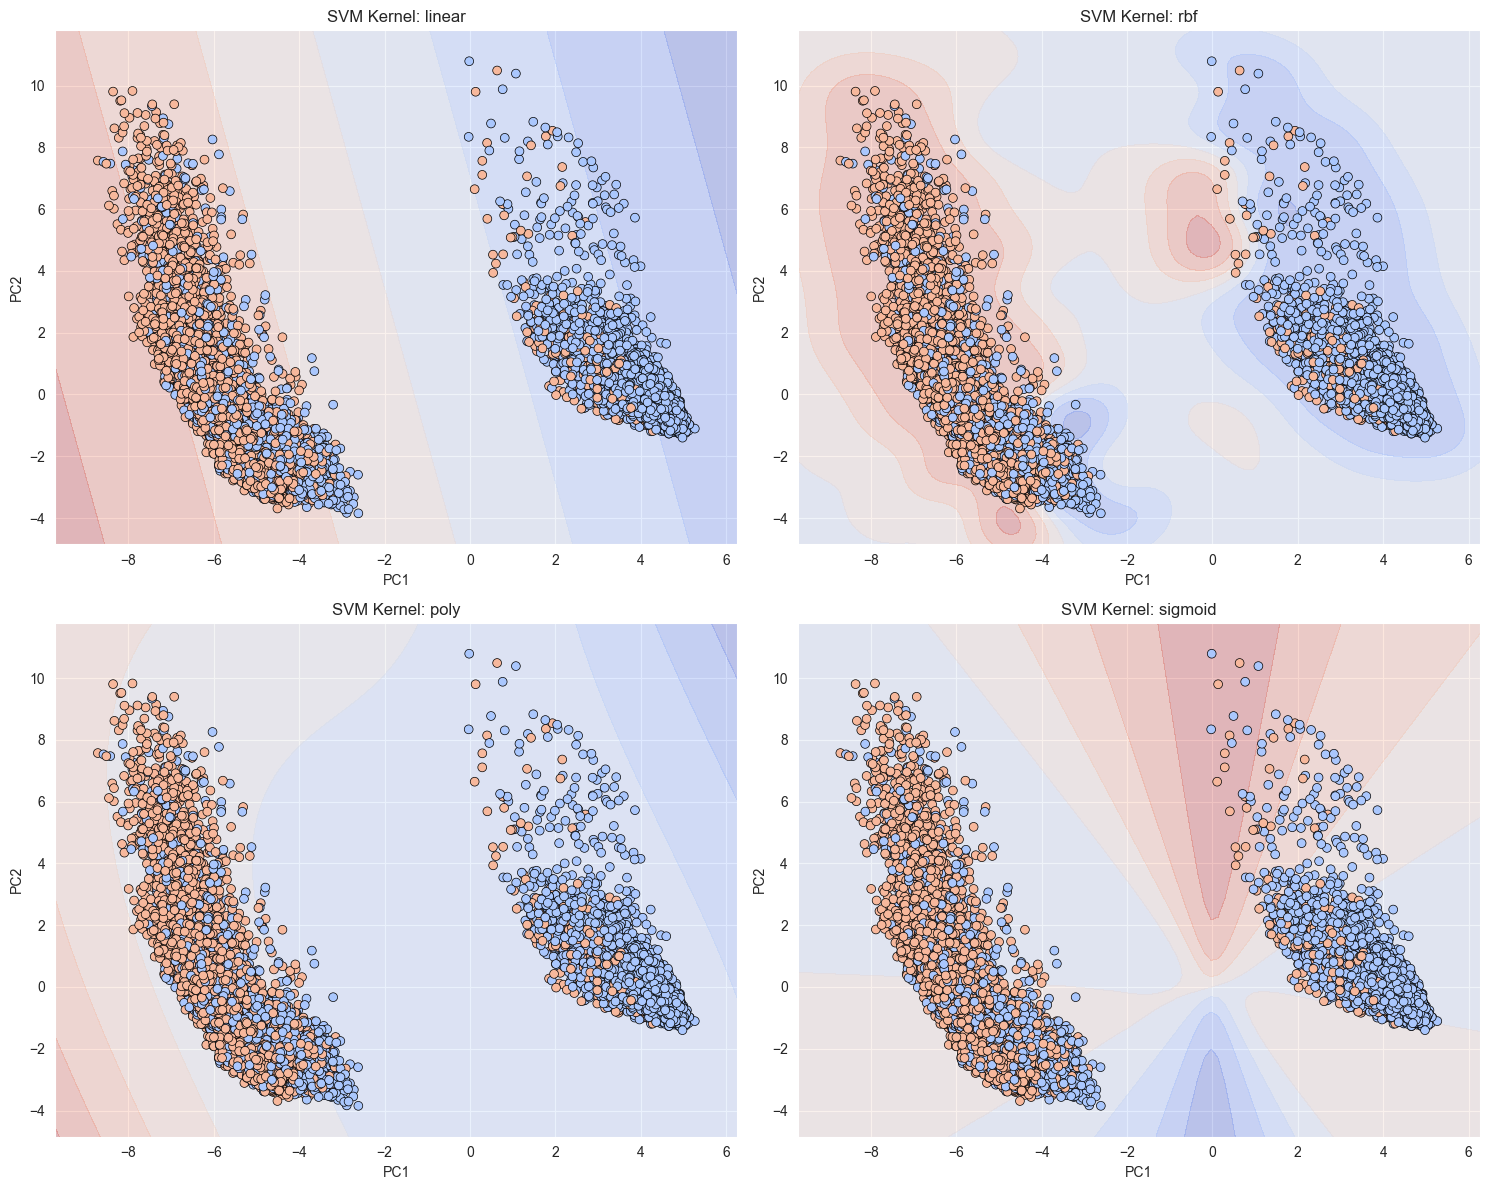

In [16]:
transformer_pipeline = Pipeline(logreg_pipeline.steps[:-1])
X_transformed = transformer_pipeline.fit_transform(X_train, y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
titles = ['SVM Kernel: linear', 'SVM Kernel: rbf', 'SVM Kernel: poly', 'SVM Kernel: sigmoid']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, kernel in enumerate(kernels):
    clf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('variance_threshold', var_thresh),
        ('select_k_best', select_k),
        ('rfe', rfe),
        ('classifier', SVC(kernel=kernel, gamma='auto', probability=True))
    ])
    clf_pipeline.fit(X_train, y_train)

    plot_clf = SVC(kernel=kernel, gamma='auto')
    plot_clf.fit(X_pca, y_train)

    display = DecisionBoundaryDisplay.from_estimator(
        plot_clf, X_pca, ax=axes[i], alpha=0.3, cmap='coolwarm'
    )

    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train,
                    palette='coolwarm', ax=axes[i], edgecolor='k', s=40, legend=False)

    axes[i].set_title(titles[i])
    axes[i].set_xlabel("PC1")
    axes[i].set_ylabel("PC2")

plt.tight_layout()
plt.show()


We see that the RBF kernel is indeed the best possible one, and we can safely apply the hyperparameters obtained during the tuning phase.
SVM:

In [11]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=mutual_info_classif, k=100)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=log_reg, n_features_to_select=50)

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', SVC(C=1, gamma='auto', kernel='rbf', probability=True))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

cv_scores = cross_val_score(svm_pipeline, X, y, cv=cv, scoring='roc_auc')

print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean ROC AUC: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

svm_pipeline.fit(X_train, y_train)

test_proba = svm_pipeline.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)

train_proba = svm_pipeline.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")

Cross-validation ROC AUC scores: [0.94964828 0.95371292 0.94419841 0.95131139 0.94903186]
Mean ROC AUC: 0.9496
Standard deviation: 0.0031
Training roc_auc: 0.9681028956104357
Testing roc_auc: 0.9531532422028557


Random forest:

In [12]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=mutual_info_classif, k=100)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=log_reg, n_features_to_select=50)

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

cv_scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='roc_auc')

print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean ROC AUC: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

rf_pipeline.fit(X_train, y_train)

test_proba = rf_pipeline.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)

train_proba = rf_pipeline.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")

Cross-validation ROC AUC scores: [0.96346126 0.96565724 0.96136304 0.9644651  0.96398186]
Mean ROC AUC: 0.9638
Standard deviation: 0.0014
Training roc_auc: 0.9971619732248884
Testing roc_auc: 0.9629772815432333


LightGBM:

In [13]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=mutual_info_classif, k=100)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=log_reg, n_features_to_select=50)

lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=10, min_child_samples=50, n_estimators=500, num_leaves=31, subsample=1))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

cv_scores = cross_val_score(lgbm_pipeline, X, y, cv=cv, scoring='roc_auc')

print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean ROC AUC: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

lgbm_pipeline.fit(X_train, y_train)

test_proba = lgbm_pipeline.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)

train_proba = lgbm_pipeline.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")

[LightGBM] [Info] Number of positive: 4641, number of negative: 10467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 471
[LightGBM] [Info] Number of data points in the train set: 15108, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307188 -> initscore=-0.813298
[LightGBM] [Info] Start training from score -0.813298


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4641, number of negative: 10468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307168 -> initscore=-0.813393
[LightGBM] [Info] Start training from score -0.813393


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4642, number of negative: 10467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 466
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307234 -> initscore=-0.813082
[LightGBM] [Info] Start training from score -0.813082


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4642, number of negative: 10467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307234 -> initscore=-0.813082
[LightGBM] [Info] Start training from score -0.813082


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4642, number of negative: 10467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 15109, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307234 -> initscore=-0.813082
[LightGBM] [Info] Start training from score -0.813082


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Cross-validation ROC AUC scores: [0.96736735 0.96856027 0.96307663 0.96673524 0.96738533]
Mean ROC AUC: 0.9666
Standard deviation: 0.0019
[LightGBM] [Info] Number of positive: 4615, number of negative: 10493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 15108, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305467 -> initscore=-0.821397
[LightGBM] [Info] Start training from score -0.821397


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training roc_auc: 0.9793640686423668
Testing roc_auc: 0.965372976315852


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


After training the models, and evaluating them on a 5-fold cross validation using ROC-AUC score as well as the training and testing ROC-AUC score to detect potential overfitting, we will further evaluate and compare the models on testing data using a classification report (mainly for precision and recall), MCC, Accuracy and plot the ROC curves along with the obtained AUC score.


Results for Logistic Regression


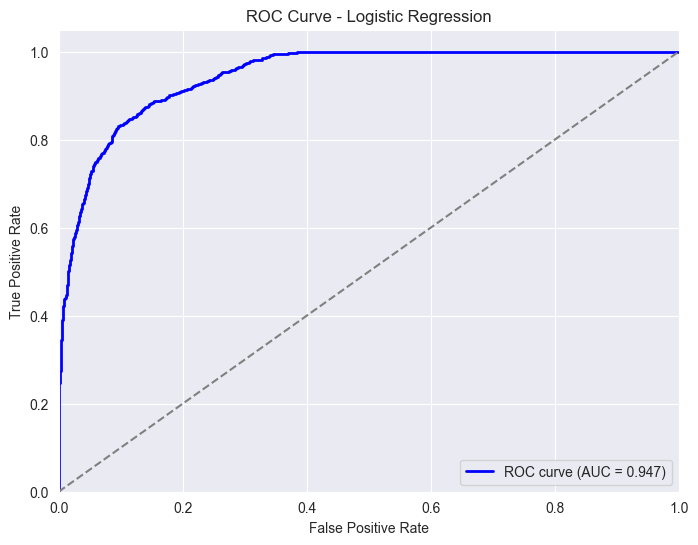

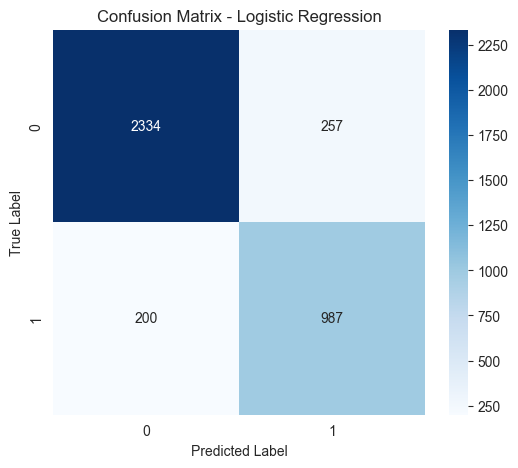

ROC AUC Score: 0.947
Matthews Correlation Coefficient: 0.723
Accuracy Score: 0.879
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      2591
         1.0       0.79      0.83      0.81      1187

    accuracy                           0.88      3778
   macro avg       0.86      0.87      0.86      3778
weighted avg       0.88      0.88      0.88      3778


Results for SVM


<Figure size 1000x800 with 0 Axes>

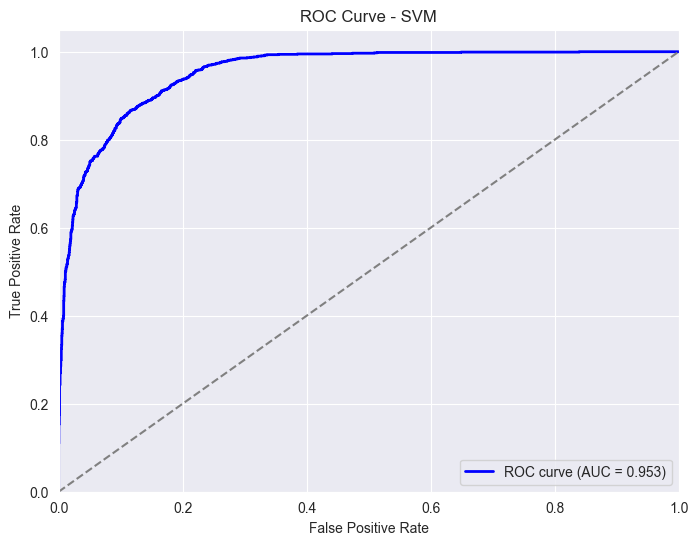

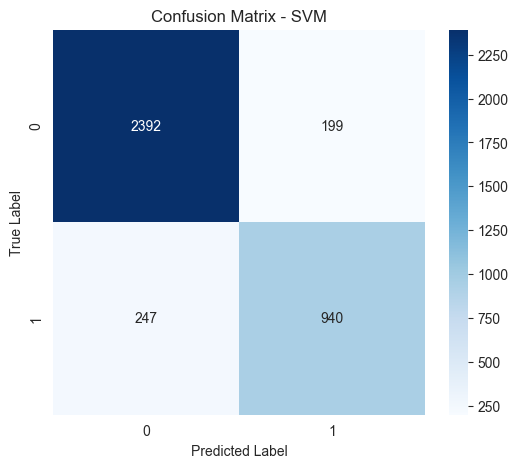

ROC AUC Score: 0.953
Matthews Correlation Coefficient: 0.723
Accuracy Score: 0.882
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      2591
         1.0       0.83      0.79      0.81      1187

    accuracy                           0.88      3778
   macro avg       0.87      0.86      0.86      3778
weighted avg       0.88      0.88      0.88      3778


Results for Random Forest


<Figure size 1000x800 with 0 Axes>

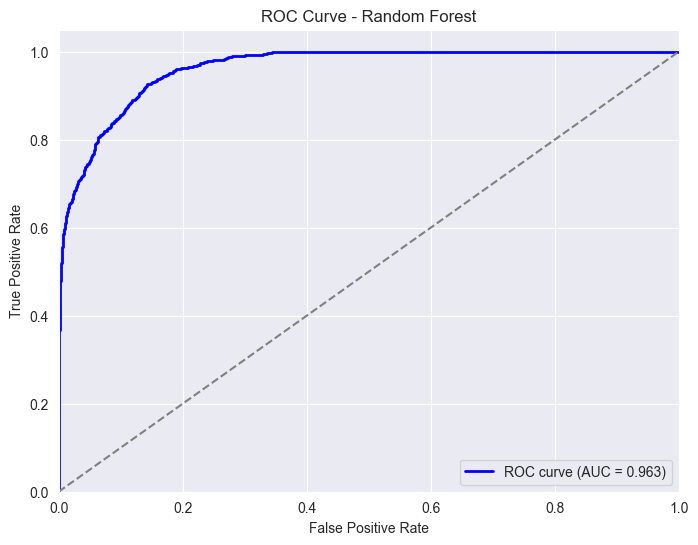

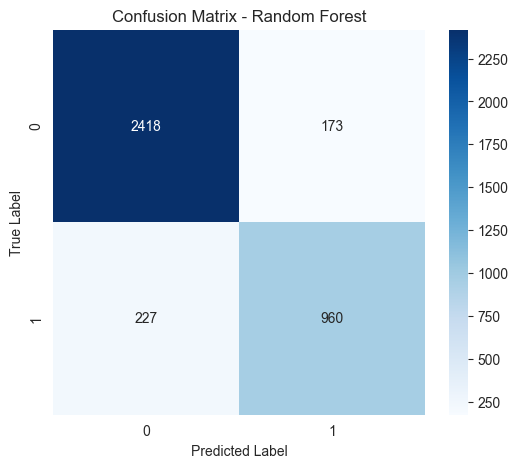

ROC AUC Score: 0.963
Matthews Correlation Coefficient: 0.752
Accuracy Score: 0.894
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      2591
         1.0       0.85      0.81      0.83      1187

    accuracy                           0.89      3778
   macro avg       0.88      0.87      0.88      3778
weighted avg       0.89      0.89      0.89      3778


Results for LightGBM


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

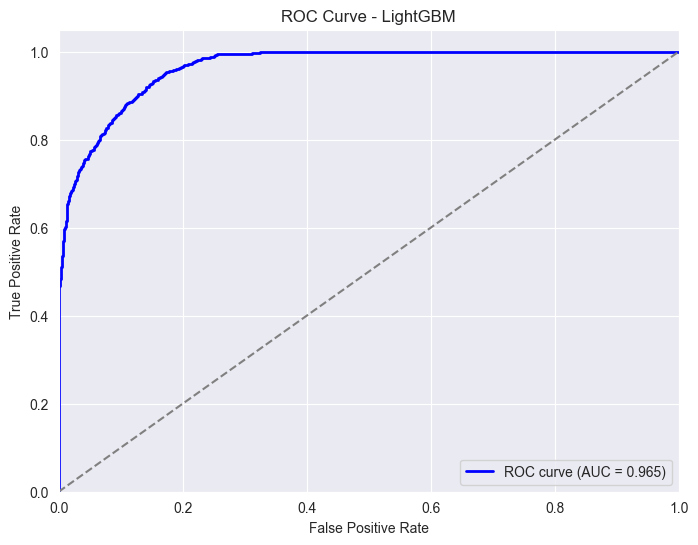

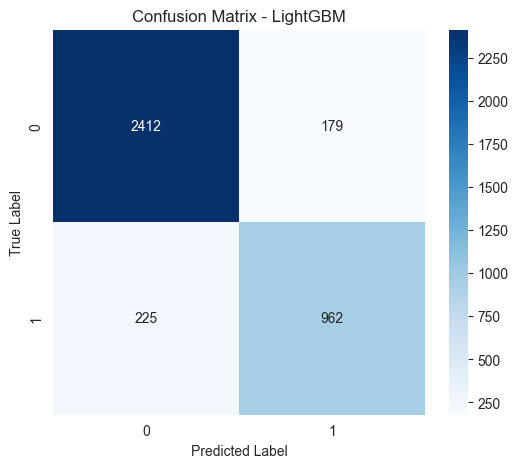

ROC AUC Score: 0.965
Matthews Correlation Coefficient: 0.750
Accuracy Score: 0.893
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      2591
         1.0       0.84      0.81      0.83      1187

    accuracy                           0.89      3778
   macro avg       0.88      0.87      0.87      3778
weighted avg       0.89      0.89      0.89      3778


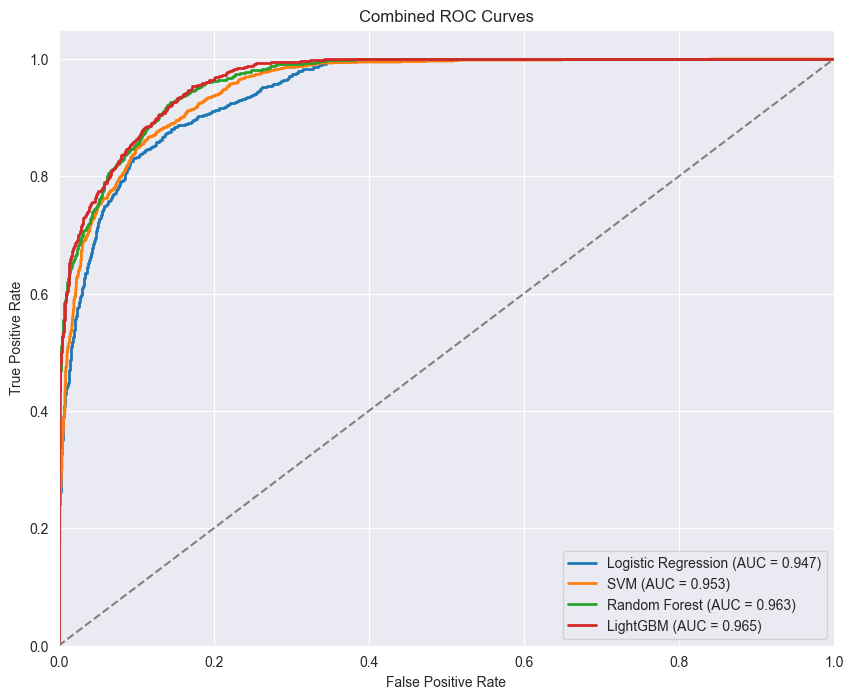

In [14]:
pipelines = {
    "Logistic Regression": logreg_pipeline,
    "SVM": svm_pipeline,
    "Random Forest": rf_pipeline,
    "LightGBM": lgbm_pipeline
}
roc_data = {}

for name, pipeline in pipelines.items():
    print(f"\nResults for {name}" )  
    
    try:
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_prob = pipeline.decision_function(X_test)    
    
    y_pred = pipeline.predict(X_test) 
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

    
    class_report = classification_report(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print(f"ROC AUC Score: {roc_auc:.3f}")
    print(f"Matthews Correlation Coefficient: {mcc:.3f}")
    print(f"Accuracy Score: {accuracy:.3f}")
    print("Classification Report:\n", class_report)
    
    plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined ROC Curves")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

As a last step we export the best performing pipeline using joblib.

In [13]:
joblib.dump(lgbm_pipeline, 'pipeline.joblib')

['pipeline.joblib']

From the results, it is apparent that LightGBM has the best performance on out primary evaluation metric (ROC-AUC score), and we will continue with attempts to advance this score further using oversampling, early stopping and experimenting with the hyperparametes in the notebook "experimenting.ipynb"